In [61]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

import sys
sys.path.append('../molecules')
from rdkit.Chem import MolToSmiles, MolFromSmiles

In [62]:
fragments = ['*CCC', '*CCc1cccc(-c2ccccc2)c1', '*N(*)*', '*C(*)=O', '*NC1C(N)C=C(C(=O)O)OC1*', 'C(*)(C)=O']

In [63]:
def replace_last(s, old, new):
    s_reversed = s[::-1]
    old_reversed = old[::-1]
    new_reversed = new[::-1]

    # Replace the first occurrence in the reversed string
    s_reversed = s_reversed.replace(old_reversed, new_reversed, 1)

    # Reverse the string back to original order
    return s_reversed[::-1]

In [64]:
def reconstruct(fragments):
    print("Reconstructing...")
    frag_recomb_list = []
    frag_2_re = fragments[-1]
    for i in range(len(fragments)-1):
        frag_1_re = fragments[-1*i-2]
        recomb = replace_last(frag_2_re, "*", frag_1_re.replace("*", "",1))
        recomb_canon = MolToSmiles(MolFromSmiles(Chem.CanonSmiles(recomb)),rootedAtAtom = 1)
        print("Base Molecule: ",frag_2_re)
        print("Fragment: ",frag_1_re)
        print("Recombined: ",recomb_canon)
        frag_recomb_list.append(recomb_canon)
        frag_2_re = recomb_canon
    print("Reconstructed Fragments: ",frag_recomb_list)
    molecules = [Chem.MolFromSmiles(smiles) for smiles in frag_recomb_list]
    img = Chem.Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(600, 600))
    return img

Reconstructing...
Base Molecule:  C(*)(C)=O
Fragment:  *NC1C(N)C=C(C(=O)O)OC1*
Recombined:  C1(*)OC(C(=O)O)=CC(N)C1NC(C)=O
Base Molecule:  C1(*)OC(C(=O)O)=CC(N)C1NC(C)=O
Fragment:  *C(*)=O
Recombined:  C(*)(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Base Molecule:  C(*)(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Fragment:  *N(*)*
Recombined:  N(*)(*)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Base Molecule:  N(*)(*)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Fragment:  *CCc1cccc(-c2ccccc2)c1
Recombined:  N(*)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Base Molecule:  N(*)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Fragment:  *CCC
Recombined:  C(C)CN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O
Reconstructed Fragments:  ['C1(*)OC(C(=O)O)=CC(N)C1NC(C)=O', 'C(*)(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', 'N(*)(*)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', 'N(*)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', 'C(C)CN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O']


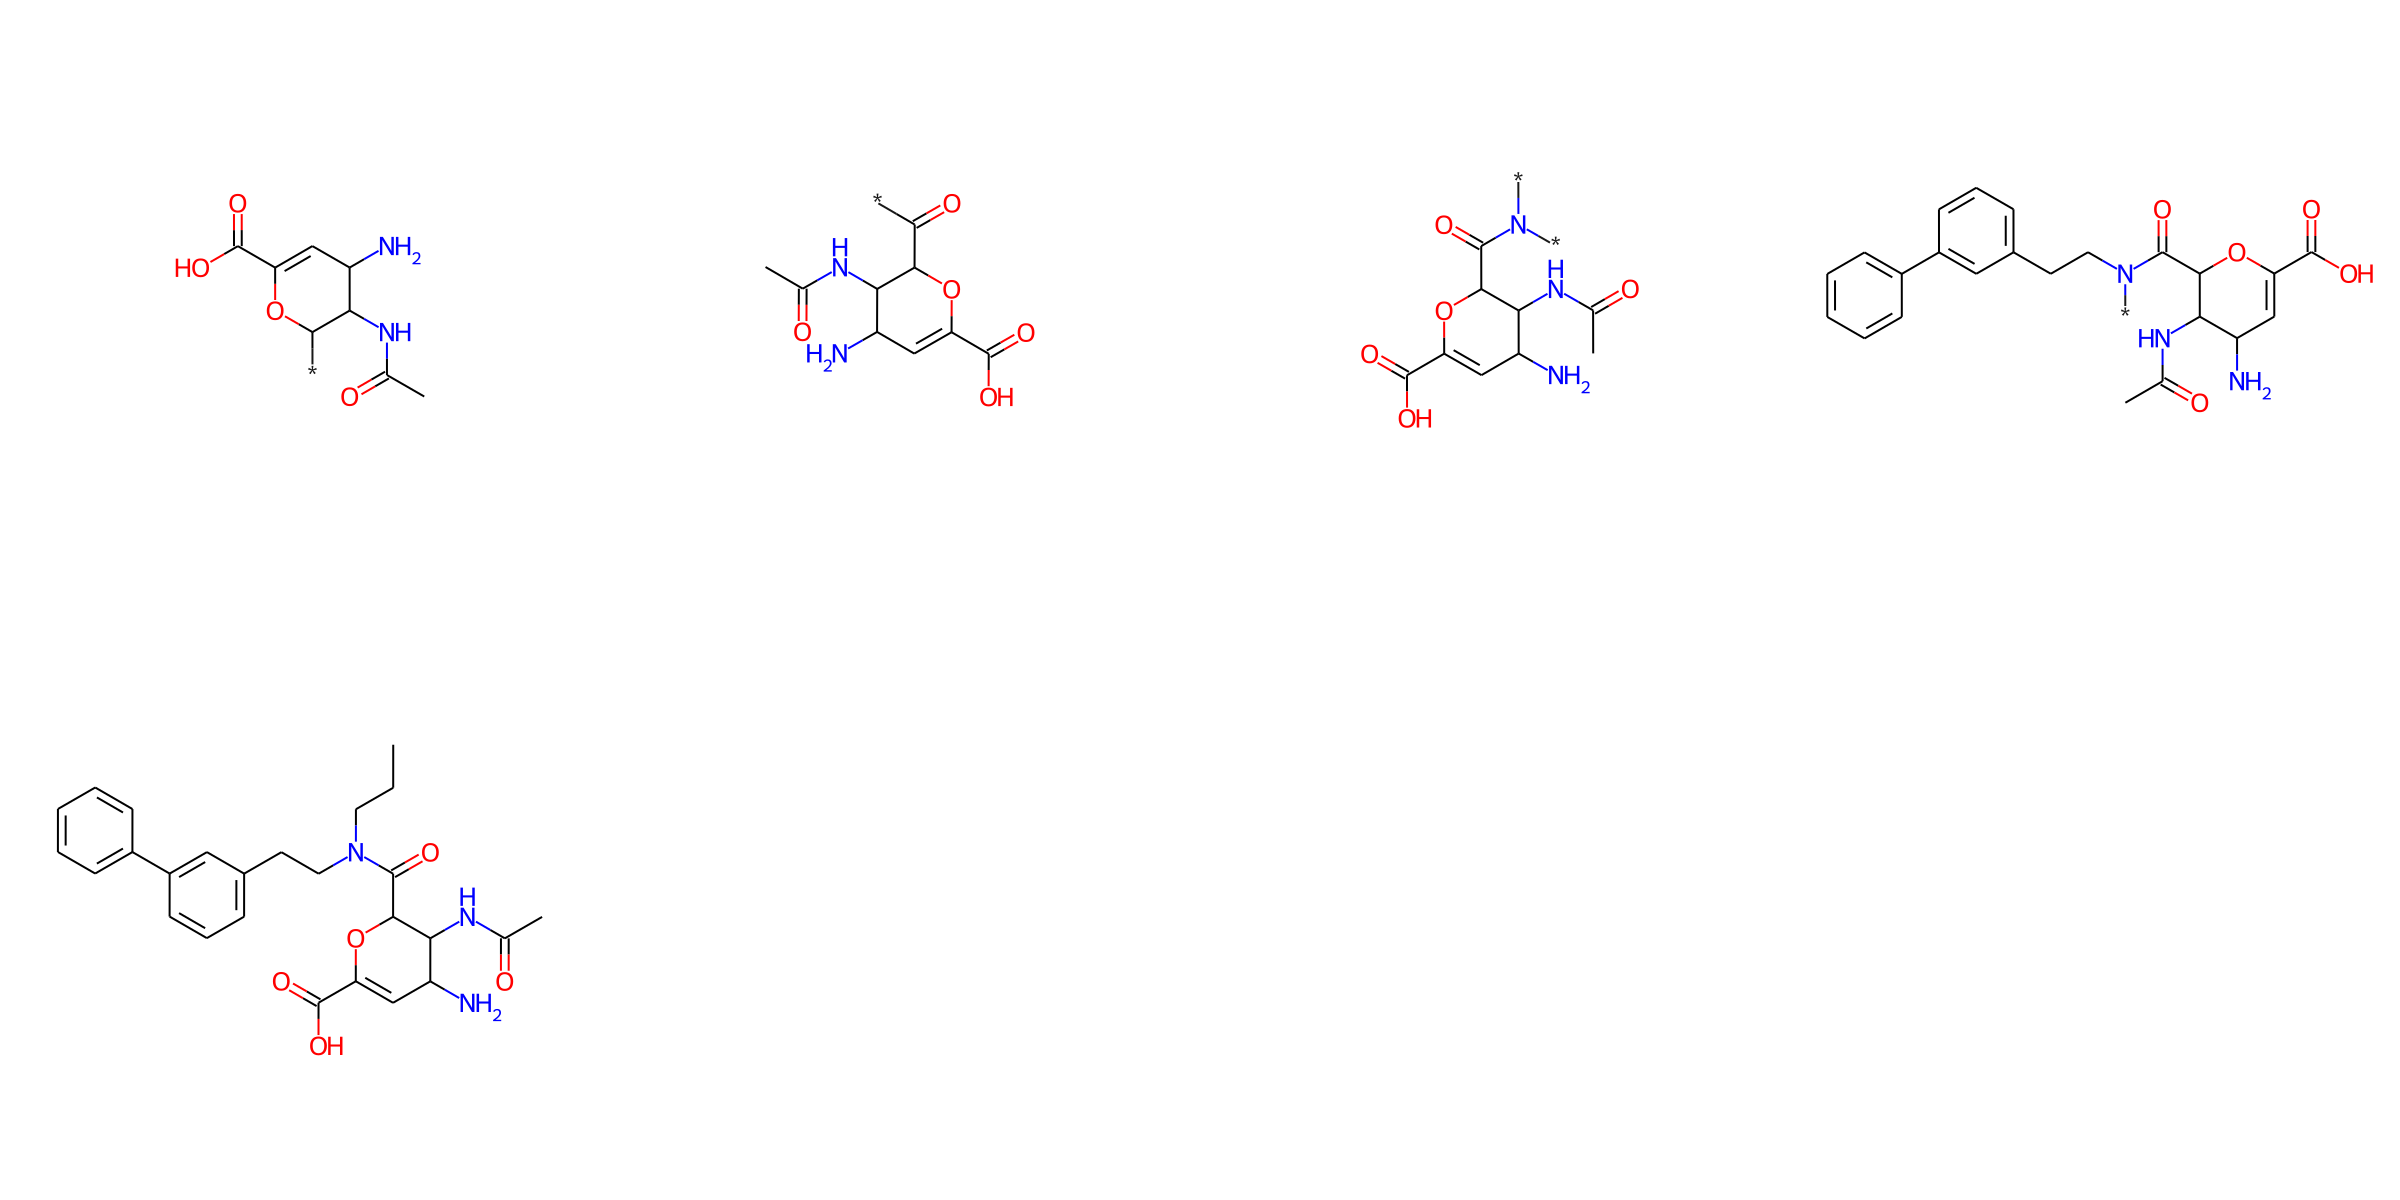

In [65]:
img = reconstruct(fragments)
img

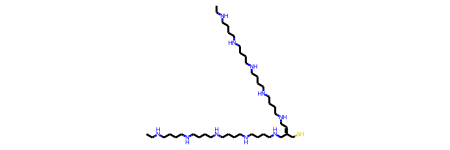

In [66]:
MolFromSmiles("CCNCCCCNCCCCNCCCCNCCCCNCC=C(CS)CNCCCCNCCCCNCCCCNCCCCNCC")